## Notebook for learning how to run simulation batches

First import required model and its parameters.

In [1]:
from ModularCirc.Models.NaghaviModel import NaghaviModel, NaghaviModelParameters, TEMPLATE_TIME_SETUP_DICT

Introducing `BatchRunner` a new class which is meant to facilitate running batches of simulations.

In [2]:
from ModularCirc import BatchRunner

Instantiate `BatchRunner` providing the sampling method used to define the batch.

In [3]:
br = BatchRunner('LHS', 0)  #LHS = Latin HyperCube

Provide the json file detailing the parameter ranges, where these are sampled, or values, where they are constant.

```json
{
    COMPONENT_TYPE_1 : {
        COMPONENT_1 : [
            PARAMETER_1 : [VALUE, [SCALE_RANGE_MIN, SCALE_RANGE_MAX]],
            PARAMETER_2 : [CONSTANT],
            PARAMETER_3 : ...,
        ...
        ]
        COMPONENT_2 : ...
        ...
    }
    COMPONENT_TYPE_2 : ...
    ...
}
```

In [4]:
# Parameters_01 = Naghavi Model
br.setup_sampler('parameters_01.json')

### **Sample:**

In [5]:
# Set number of samples 
br.sample(10)

In [6]:
br.samples

,ao.r,ao.c,art.r,art.c,ven.r,ven.c,av.r,mv.r,la.E_pas,la.E_act,...,ven.v_ref,la.v,la.delay,la.t_tr,la.tau,la.t_max,lv.delay,lv.t_tr,lv.tau,lv.t_max
0,320.712920,0.381906,1232.890479,2.695042,12.768057,187.782968,5.036019,3.390906,0.328081,0.362922,...,2800,93,150,225,25,150,0,420,25,280
1,184.806915,0.287319,1121.814037,3.862715,11.996438,124.672964,6.230769,2.302692,0.572123,0.405862,...,2800,93,150,225,25,150,0,420,25,280
2,132.339951,0.303315,1582.420104,1.692661,10.285623,182.329481,3.243420,5.601456,0.554769,0.589938,...,2800,93,150,225,25,150,0,420,25,280
3,159.933191,0.175492,1524.336821,3.361103,6.092422,79.286556,8.157269,2.788610,0.392007,0.333885,...,2800,93,150,225,25,150,0,420,25,280
4,229.430948,0.241362,956.261721,2.872431,11.141808,106.705364,3.630634,4.321381,0.274660,0.292616,...,2800,93,150,225,25,150,0,420,25,280
5,289.741826,0.330962,673.345541,3.040908,9.016924,147.200388,5.910742,4.931222,0.224843,0.502993,...,2800,93,150,225,25,150,0,420,25,280
6,287.027743,0.218040,830.883010,4.191490,8.352702,93.096830,8.545229,3.889769,0.487119,0.582026,...,2800,93,150,225,25,150,0,420,25,280
7,194.685160,0.443224,1335.987596,2.013501,6.672489,139.243974,6.714174,4.690205,0.471309,0.656420,...,2800,93,150,225,25,150,0,420,25,280
8,254.243752,0.182701,782.654975,2.153188,5.026154,95.578713,4.794027,3.130331,0.436540,0.465632,...,2800,93,150,225,25,150,0,420,25,280
9,348.267611,0.390706,1375.234741,4.407343,7.857147,161.784608,7.271216,5.940610,0.644851,0.225229,...,2800,93,150,225,25,150,0,420,25,280


In [7]:
TEMPLATE_TIME_SETUP_DICT

{'name': 'TimeTest',
 'ncycles': 30,
 'tcycle': 1000.0,
 'dt': 1.0,
 'export_min': 1}

### Rescale the timing parameters and map to actual parameters where appropriate.

In [8]:
map_ = {
    'lv.t_tr' : ['lv.t_tr',],
    'la.t_tr' : ['la.t_tr',],
    'la.delay' : ['la.delay',],
    'lv.tau' : ['lv.tau',],
    'la.tau' : ['la.tau',],
    'lv.t_max' : ['lv.t_max',],
    'la.t_max' : ['la.t_max',],
}
br.map_sample_timings(
    ref_time=1000.,
    map=map_
    )

In [9]:
br.samples

,ao.r,ao.c,art.r,art.c,ven.r,ven.c,av.r,mv.r,la.E_pas,la.E_act,...,ven.v_ref,la.v,la.delay,la.t_tr,la.tau,la.t_max,lv.delay,lv.t_tr,lv.tau,lv.t_max
0,320.712920,0.381906,1232.890479,2.695042,12.768057,187.782968,5.036019,3.390906,0.328081,0.362922,...,2800,93,46.847085,70.270627,7.807847,46.847085,0,131.171837,7.807847,87.447891
1,184.806915,0.287319,1121.814037,3.862715,11.996438,124.672964,6.230769,2.302692,0.572123,0.405862,...,2800,93,91.907717,137.861575,15.317953,91.907717,0,257.341607,15.317953,171.561071
2,132.339951,0.303315,1582.420104,1.692661,10.285623,182.329481,3.243420,5.601456,0.554769,0.589938,...,2800,93,127.667463,191.501194,21.277910,127.667463,0,357.468896,21.277910,238.312597
3,159.933191,0.175492,1524.336821,3.361103,6.092422,79.286556,8.157269,2.788610,0.392007,0.333885,...,2800,93,63.507040,95.260560,10.584507,63.507040,0,177.819712,10.584507,118.546475
4,229.430948,0.241362,956.261721,2.872431,11.141808,106.705364,3.630634,4.321381,0.274660,0.292616,...,2800,93,83.948409,125.922614,13.991402,83.948409,0,235.055546,13.991402,156.703698
5,289.741826,0.330962,673.345541,3.040908,9.016924,147.200388,5.910742,4.931222,0.224843,0.502993,...,2800,93,106.522837,159.784255,17.753806,106.522837,0,298.263943,17.753806,198.842629
6,287.027743,0.218040,830.883010,4.191490,8.352702,93.096830,8.545229,3.889769,0.487119,0.582026,...,2800,93,163.005328,244.507992,27.167555,163.005328,0,456.414918,27.167555,304.276612
7,194.685160,0.443224,1335.987596,2.013501,6.672489,139.243974,6.714174,4.690205,0.471309,0.656420,...,2800,93,141.548069,212.322103,23.591345,141.548069,0,396.334592,23.591345,264.223062
8,254.243752,0.182701,782.654975,2.153188,5.026154,95.578713,4.794027,3.130331,0.436540,0.465632,...,2800,93,174.859598,262.289397,29.143266,174.859598,0,489.606875,29.143266,326.404583
9,348.267611,0.390706,1375.234741,4.407343,7.857147,161.784608,7.271216,5.940610,0.644851,0.225229,...,2800,93,113.502853,170.254280,18.917142,113.502853,0,317.807989,18.917142,211.871993


use `map_vessel_volumes` to define the initial distribution of blood in the vessels

In [10]:
br.map_vessel_volume()
br._samples[['ao.v', 'art.v', 'ven.v']].describe().T

,count,mean,std,min,25%,50%,75%,max
ao.v,10.0,10.889359,2.286558,8.098017,8.816897,11.032872,12.017543,14.718737
art.v,10.0,119.478036,52.436377,54.018375,87.774544,105.835461,151.511245,224.713593
ven.v,10.0,4867.753707,905.512294,3587.508726,4326.127091,4803.037574,5671.227352,6094.772670


Provide the model you want to be run on the parameters.

In [11]:
br.setup_model(model=NaghaviModel, po=NaghaviModelParameters, time_setup=TEMPLATE_TIME_SETUP_DICT)

Run the simulations.

In [12]:
import os

In [13]:
path = os.getcwd()
path

'/Users/pmzff/Documents/GitHub/ModularCircFF/Tutorials/Tutorial_03'

In [14]:
os.system(f'mkdir -p {path+'/Outputs/Out_01'}')
test = br.run_batch(n_jobs=2, output_path=path+'/Outputs/Out_01')

100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


In [15]:
# Each row of the sampled parameters (realisations) gives 1000 rows (time_ind) of output for the 16 output parameters.
test

[                            v_ao        v_art        v_ven       v_la  \
 realization time_ind                                                    
 0           0         166.393742  1332.777788  4534.730900  42.037914   
             1         166.380823  1332.752331  4534.827549  41.979639   
             2         166.367927  1332.726853  4534.922333  41.923229   
             3         166.355056  1332.701354  4535.015217  41.868715   
             4         166.342208  1332.675834  4535.106174  41.816127   
 ...                          ...          ...          ...        ...   
             995       167.013558  1336.943428  4529.817468  42.237058   
             996       167.000564  1336.917648  4529.921782  42.171518   
             997       166.987594  1336.891847  4530.024365  42.107707   
             998       166.974647  1336.866024  4530.125181  42.045659   
             999       166.961724  1336.840181  4530.224197  41.985410   
 
                             v_lv   

In [16]:
# Output of first realisation
ind = 0
test[ind].loc[ind]

,v_ao,v_art,v_ven,v_la,v_lv,p_lv,q_av,p_ao,p_art,q_ao,p_ven,q_art,p_la,q_ven,q_mv,T
time_ind,,,,,,,,,,,,,,,,
0,166.393742,1332.777788,4534.730900,42.037914,158.621291,34.074283,0.0,173.848204,160.582965,0.041362,9.237957,0.122756,11.655577,-0.189349,0.0,6878.096144
1,166.380823,1332.752331,4534.827549,41.979639,158.621291,35.936648,0.0,173.814377,160.573519,0.041286,9.238471,0.122748,11.580612,-0.183438,0.0,6878.408770
2,166.367927,1332.726853,4534.922333,41.923229,158.621291,37.871329,0.0,173.780611,160.564065,0.041210,9.238976,0.122740,11.504332,-0.177424,0.0,6878.721397
3,166.355056,1332.701354,4535.015217,41.868715,158.621291,39.877478,0.0,173.746908,160.554604,0.041134,9.239471,0.122732,11.426774,-0.171311,0.0,6879.034023
4,166.342208,1332.675834,4535.106174,41.816127,158.621291,41.954211,0.0,173.713267,160.545135,0.041059,9.239955,0.122724,11.347975,-0.165101,0.0,6879.346650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,167.013558,1336.943428,4529.817468,42.237058,158.550122,27.340393,0.0,175.471159,162.128633,0.041603,9.211791,0.124031,11.923338,-0.212370,0.0,7189.159535
996,167.000564,1336.917648,4529.921782,42.171518,158.550122,28.904900,0.0,175.437134,162.119067,0.041526,9.212347,0.124023,11.854020,-0.206897,0.0,7189.472161
997,166.987594,1336.891847,4530.024365,42.107707,158.550122,30.544768,0.0,175.403172,162.109494,0.041450,9.212893,0.124015,11.783240,-0.201311,0.0,7189.784788


In [17]:
# Summary stats of output of first realisation
ind = 0
test[ind].loc[ind].describe()

,v_ao,v_art,v_ven,v_la,v_lv,p_lv,q_av,p_ao,p_art,q_ao,p_ven,q_art,p_la,q_ven,q_mv,T
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,179.361240,1340.659267,4517.419222,67.861288,129.260618,50.447144,0.139898,207.802856,163.507402,0.138116,9.145767,0.125203,7.367107,0.139305,0.139662,7034.253092
std,10.857337,4.088464,8.289035,12.717399,13.581090,84.082749,0.519658,28.429315,1.517032,0.089434,0.044142,0.001265,2.796440,0.219377,0.211671,90.292616
min,165.841493,1331.388053,4510.449118,41.195905,114.887693,5.980284,0.000000,172.402172,160.067301,0.038201,9.108649,0.122330,2.493648,-0.376334,0.000000,6878.096144
25%,170.058926,1338.320390,4511.098436,59.264973,117.242275,6.920983,0.000000,183.445280,162.639557,0.061558,9.112107,0.124478,6.317323,0.087970,0.000000,6956.174618
50%,176.284385,1341.882227,4513.393428,75.104879,127.092653,7.812313,0.000000,199.746287,163.961183,0.108794,9.124328,0.125591,7.217755,0.148814,0.083783,7034.253092
75%,187.186711,1344.153869,4522.054174,77.292031,133.099131,28.282845,0.000000,228.293403,164.804080,0.200342,9.170449,0.126281,7.993457,0.222009,0.142957,7112.331567
max,203.196009,1344.939155,4536.914485,79.028017,158.621291,272.481341,2.862389,270.212830,165.095462,0.339979,9.249585,0.126518,13.973022,0.526345,0.926367,7190.410041


In [18]:
import matplotlib.pyplot as plt

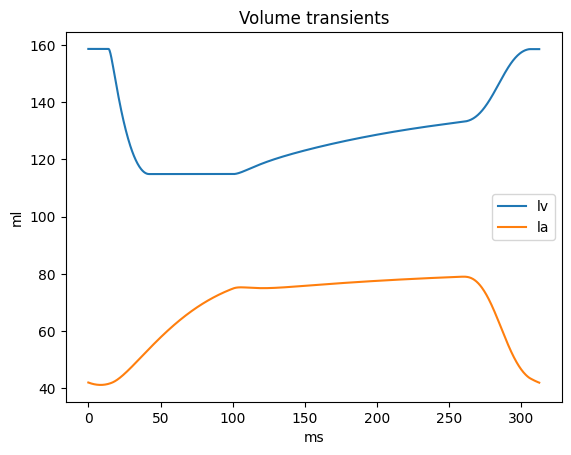

In [19]:
t = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]

fig, ax = plt.subplots()

ax.plot(t, test[ind].loc[ind]['v_lv'], label='lv')
ax.plot(t, test[ind].loc[ind]['v_la'], label='la')

ax.set_xlabel('ms')
ax.set_ylabel('ml')

ax.legend()
ax.set_title('Volume transients')

plt.show()